## Advanced Sentinel-2 image processing, statistics, and plots

This advanced Notebook builds on the beginner Notebook and shows some extended data processing and statistical tools on Sentinel-2 TOC reflectance data. After reading the data, it is shown how to make transects through the data. Further, the following functionalities will be highlighted:

- Status Map filtering
- compute advanced statistics
- retrieve statistics from shp file
- build stack for RGB + time series
- extract time series

Let's start again with importing the required packages.

In [2]:
import rasterio
import matplotlib.pyplot as mplot                       #standard matplotlib module
from mpl_toolkits.axes_grid1 import make_axes_locatable #this module is needed to resize the colorbar to the plot size
import seaborn as sns                                   #seaborn gives nicer plotting results
import glob                                             #module to search for dirs/files
import numpy as np

As for the Sentinel-2 beginner notebook, we load Sentinel-2 10 m TOC reflectance files for the 0.665 $\mu$m (RED) and 0.842 $\mu$m (NIR) bands.

In [3]:
#filename of the Sentinel-2 image we will work on, B05=RED
f_red = '/data/MTDA/CGS_S2/CGS_S2_RADIOMETRY/2017/05/26/S2A_20170526T105031Z_31UES_CGS_V102_000/S2A_20170526T105031Z_31UES_TOC_V102/S2A_20170526T105031Z_31UES_TOC-B05_20M_V102.tif'

#read the files with rasterio and print some attributes
with rasterio.open(f_red, 'r') as data:
    d_red = data.read(1).astype(float)

After reading the data, we will first mask out all NoData values, as well as negative TOC reflectances, which are physically impossible. After this screening is done, we can compute the TOC NDVI.  

In [4]:
#TBD: read the nodata and scaling factor from the files' metadata
noval = np.where((d_red == 32767) | (d_red < 0))    
d_red[noval] = np.nan

#apply the scaling factor
d_red = d_red * 0.0001 

## Status Map filtering
The Sentinel 2 Scene Classification contains among others information on cloud and cloud shadow occurrence and whether a pixel is land or water. Below the Scene Classification file is read and presented. Subsequently, the RED and NIR TOC reflectances will be filtered on land surface.


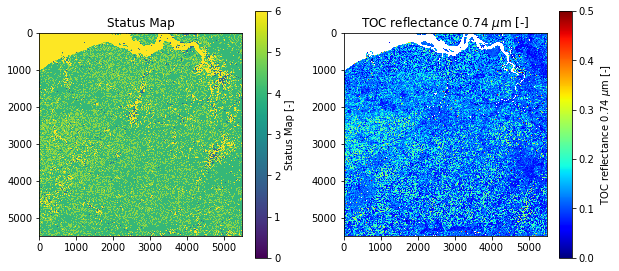

In [6]:
f_status = '/data/MTDA/CGS_S2/CGS_S2_RADIOMETRY/2017/05/26/S2A_20170526T105031Z_31UES_CGS_V102_000/S2A_20170526T105031Z_31UES_TOC_V102/S2A_20170526T105031Z_31UES_SCENECLASSIFICATION_20M_V102.tif'

with rasterio.open(f_status, 'r') as data:
    d_status = data.read(1).astype(int)

mplot.figure(figsize=(10, 10))
mplot.subplot(221)
mplot.imshow(d_status, vmin=0, vmax=6)
mplot.title('Status Map')

cb = mplot.colorbar(aspect=20)  
cb.ax.set_ylabel('Status Map [-]')
cb.ax.tick_params(labelsize=10)

#we are only interested in land surface pixels, so set all sea pixels to NaN
sea = np.where(d_status == 6)
d_red[sea] = np.nan

mplot.subplot(222)
mplot.imshow(d_red, cmap= 'jet', vmin=0., vmax=0.5)
mplot.title('TOC reflectance 0.74 $\mu$m [-]')

cb = mplot.colorbar(aspect=20)  
cb.ax.set_ylabel('TOC reflectance 0.74 $\mu$m [-]')
cb.ax.tick_params(labelsize=10)


## Advanced Statistics


## Image stacking
Images are often stacked in order to 1) construct a RGB image or 2) construct longer time series. For limited time series, this can be done by defining and filling a simple 3D numpy array. For more extensive 3D datasets, the xarray package is much more efficient in accessing and indexing. For the 31UES tile, we collect all days with observations for May 2017.


In [2]:
s2_dir = '/data/MTDA/CGS_S2/CGS_S2_RADIOMETRY/2017/05/'
days   = ['03', '09', '16', '23', '29']

#first, make an RGB for a single date

#go through the dates above and load images into stack

#show time series
